Tecnológico de Costa Rica

Escuela de Ingeniería en Electrónica

Maestría en Sistemas Embebidos

Profesor: MSc. Felipe Meza

Estudiante: Albert Hernández Chavarría

Carné: 200336626

# Investigación Corta 2 - Aprendizaje Supervisado


## Manejo de Librerías

Lo primero que haremos será importar las librerias básicas para nuestra investigación.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn

## Set de Datos

Ahora bien, procedemos a leer el set de datos a ser utilizado en nuestra investiación.


In [2]:
data = pd.read_csv('coffee.csv')
data.shape

(1088, 44)

Para tener una idea de la estructura e información del set de datos, imprimiremos el encabezado de la tabla.


In [3]:
data.head()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1.0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2.0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3.0,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4.0,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5.0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


Ahora bien, como un primer paso para realizar el análisis de datos se debe de categorizar el problema desde el punto de vista de entradas y salidas. Si los datos de entrada son etiquetas podríamos pensar en un problema de aprendizaje supervisado, mientras que si se trata de datos sin etiquetar podríamos pensar en métodos de aprendizaje no supervisado.
Por otro lado, si las salidas son numéricas se trata de un problema de regresión, mientras que si la salida es una clase se tratará de un problema de clasificación.

El proceso de entender los datos juega un papel protagónico en la elección del algoritmo a usar para la resolución del problema. Por ejemplo, algunos algoritmos requieren únicamente de algunas pocas muestras, mientras que otros requieren de una mayor cantidad. De igual manera, algunos algoritmos trabajan para datos de categorías, mientras que otros para datos numéricos.

Una vez que ya hemos categorizado el problema y entendido nuestros datos, se procede a identificar los algoritmos que podrían funcionar en términos de:
1) La exactitud del modelo.
2) La interpretatibilidad del modelo.
3) La complejidad del modelo.
4) La escalabilidad del modelo.


## Aprendizaje Supervisado

Para estos algoritmos, el usuario guía y entrena al algoritmo para aprender el comportamiento. Es así como se require de un set de datos para el entrenamiento y otro set de datos para la prueba de dicho entrenamiento.

## Pre-Procesado de Datos


Observando la información de nuestro data set, decidimos limitar nuestra investigación al comportamiento de las características más importantes del café en relación al color mismo del grano.


In [4]:
cols_to_use = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Color']
data = data[cols_to_use]

Procedemos a preprocesar el feature referente a color para proceder con el análisis de los datos.


In [5]:
data['Color']=data['Color'].replace({'Green': 0, 'Bluish-Green': 1, 'Blue-Green': 1, 'None': 0})
data.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Color
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0.0
1,8.75,8.67,8.5,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0.0
2,8.42,8.5,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,NaN
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0.0
4,8.25,8.5,8.25,8.5,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0.0


Corroboramos si hay datos nulos para así eliminarlos.

In [6]:
data.isnull().values.any()

True

Descartamos para nuestro análisis todas las filas con datos nulos.


In [7]:
data = data.dropna()
data.shape

(898, 13)

## Definición de Features y Labels

Vamos a definir los features y el label para nuestro análisis.

Como se mencionó anteriormente, en nuestro caso vamos a caracterizar el comportamiento de diferentes características del café en relación al color del grano mismo. Para nuestro análisis se tomarán 12 diferentes características: Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness, Cupper Points, Moisture y Total Cup Points.


In [8]:
features = data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Total.Cup.Points']]
labels = data['Color']

features_reg = data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Color']]
labels_reg = data['Total.Cup.Points']

## Linear Regression

Consiste en un método estadístico que permite el estudio de la relación entre variables. A pesar de la simplicidad del método, trabaja bien para set de datos con múltiples features.

Ahora bien, procedemos a importar la librería.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features_reg, labels_reg, test_size=0.20, random_state=14)

Se aplica regresión lineal y a comparar el resultado entre el entrenamiento y la prueba. Se observa que la precisión de ambos sets es bastante buena.


In [11]:
lr = LinearRegression().fit(X_train, y_train)

In [12]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


## Logistic Regression

Este método lleva acabo una clasificación binaria, por lo que el label debe de ser binario (en nuestro caso, dos diferentes colores del grano de café). 

El algoritmo toma una combinación lineal de los features y aplica una función no lineal.

Procedemos a importar las librerías.


In [13]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Ahora, definimos nuestro set de entrenamiento y de prueba.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=13)

Aplicamos Logistic Regression y comparamos los resultados del entrenamiento y de prueba.


In [15]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train.astype('int'))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train.astype('int'))))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test.astype('int'))))

Training set score: 0.802
Test set score: 0.831


Por último, hacemos un barrido del parámetro C (peso de regulación) y así comprobar su comportamiento. Valores más pequeños representan mayor regulación.


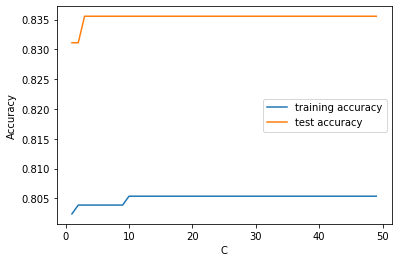

In [16]:
training_acc = []
test_acc = []

rango = range(1, 50)
for c in rango:
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X_train, y_train.astype('int'))
    training_acc.append(clf.score(X_train, y_train.astype('int')))
    test_acc.append(clf.score(X_test, y_test.astype('int')))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

## K-Nearest Neighbors

Tal y como se estudio en clase, K-Nearest representa uno de los algoritmos de aprendizaje más simples en cuanto a criterio de predicción. Consiste en predecir el punto o vecinos más cercanos de un nuevo dato.

Este modelo puede ser aplicado a set de datos con datos múltiples, para lo cual busca el límite de decisión entre clases.

Ahora bien, importamos librerías.


In [17]:
from sklearn.neighbors import KNeighborsClassifier

Definimos nuestro set de entrenamiento y de prueba.


In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=45)

Generamos las listas para iterar.


In [19]:
training_accuracy = []
test_accuracy = []

Ahora, creamos la curva de "training/test acurracy vrs. n_neighbors".


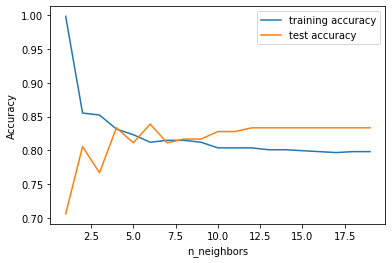

In [20]:
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train.astype('int'))
    training_accuracy.append(clf.score(X_train, y_train.astype('int')))
    test_accuracy.append(clf.score(X_test, y_test.astype('int')))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Ahora bien, podemos analizar la gráfica resultante de la siguiente manera:

1) Con un N=3, obtenemos un accuracy de 0.84 aproximadamente a costa de un modelo de alta complejidad.

2) Con un N=5, obtenemos un accuracy de 0.81 aproximadamente a costa de un modelo de mediana complejidad (mayor diferencia entre el accuracy del set de entrenamiento y el de pruebas).

3) Con un N=7, obtenemos un accuracy de 0.81 aproximadamente a costa de un modelo de baja complejidad.

El punto con N=7 representa el punto indicado, esto ya que el conjunto de pruebas entrega un buen accuracy de la mano del resultado del conjunto de entrenamiento.


In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.815
Accuracy on test set: 0.811


## Decision Tree

Representa un algoritmo basado en aprendizaje de preguntas o pruebas tipo if/else, seguidas de una decisión. 

Iniciamos importando la librería.


In [22]:
from sklearn.tree import DecisionTreeClassifier

Definimos nuestro set de entrenamiento y de prueba.


In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=13)

Ahora bien, corremos nuestro árbol con los parámetros default para observar el comportamiento.


In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 presort=False, random_state=None, splitter='best')

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.672


Se observa como se da un Overfit, por lo que procedemos a ajustar el árbol.


### Ajuste del Arbol


Los parámetros que decidimos ajustar son los de "max_depth" y "min_samples_split".


#### max_depth

Vamos a iterar el valor del parámetro max_depth para observar su comportamiento.

Vemos como el árbol predice el set de entrenamiento, sin embargo falla al realizar las pruebas. 

Como resultado, el valor de "max_depth" ideal es entre 3 y 5.


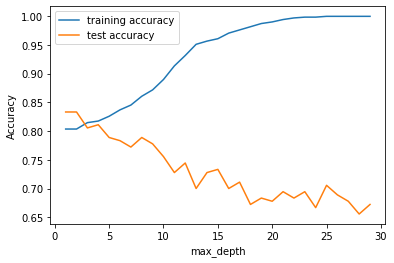

In [25]:
train_results = []
test_results = []

max_depths = range(1, 30)
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_results.append(dt.score(X_train, y_train))
    test_results.append(dt.score(X_test, y_test))
plt.plot(max_depths, train_results, label="training accuracy")
plt.plot(max_depths, test_results, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

#### min_samples_split

Este valor representa el mínimo número de muestras requeridas para dividir un nodo interno. Si aumentamos este parámetro, el árbol se vuelve más restringido, ya que tiene que considerar más muestras en cada nodo.

Como resultado, el valor de "min_samples_split" ideal es entre 260 y 280.


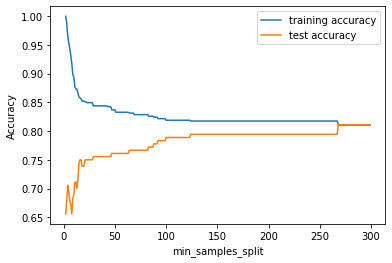

In [26]:
train_results = []
test_results = []

min_samples_splits = range(2, 300)
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_results.append(dt.score(X_train, y_train))
    test_results.append(dt.score(X_test, y_test))
plt.plot(min_samples_splits, train_results, label="training accuracy")
plt.plot(min_samples_splits, test_results, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_split")
plt.legend()

Basados en los resultados anteriores, ajustamos una profundidad de 5 pruebas (preguntas) y un min_samples_split de 270. Observamos que la precisión es aceptable. 


In [27]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=5, min_samples_split=270, random_state=0)
DecisionTreeModel.fit(X_train, y_train.astype('int'))
print("Accuracy on training set: {:.3f}".format(DecisionTreeModel.score(X_train, y_train.astype('int'))))
print("Accuracy on test set: {:.3f}".format(DecisionTreeModel.score(X_test, y_test.astype('int'))))

Accuracy on training set: 0.809
Accuracy on test set: 0.811


## Random Forest - Método por Ensamble

Este método representa un modelo más complejo que el "decision tree" y evita hasta cierto punto caer en el problema de overfit. Esto significa que en cada división del árbol, el modelo Random Forest considera solo un pequeño subconjunto de características en lugar de todas las características del modelo.

Los métodos de ensamble buscan incrementar la exactitud a partir de la combinación de las predicciones de múltiples modelos. Ahora bien, la evaluación de la predicción de estos métodos generalmente requiere de más cálculos que la predicción de un solo modelo, por lo que se puede pensar en un costo-benficio asociado entre la mejora de los algoritmos a costas de un precio algo de cálculos de computación. Los algoritmos rápidos, como los árboles de decisión (Decision Tree), se usan comúnmente en los métodos de ensamble como por ejemplo el caso de Random Forest.

Ahora bien, a pesar de que este modelo posee varios parámetros de ajuste, nos enfocaremos en "n_estimators" y "max_depth". 

Iniciamos importando las librerías y asignamos los set de entrenamiento y pruebas.


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=33)

Inicialmente, corremos el método con los parámetros default y así tener nuestra referencia. Se observa un overfit.


In [30]:
RandomForestModel = RandomForestClassifier(n_estimators=100)
RandomForestModel.fit(X_train, y_train)
print("Training set score: {:.3f}".format(RandomForestModel.score(X_train, y_train)))
print("Test set score: {:.3f}".format(RandomForestModel.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.769


### Ajuste del Random Forest

Realizamos un barrido del parámetro "n_estimators".


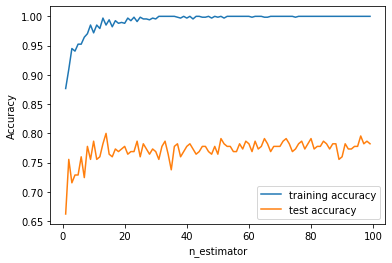

In [31]:
train_results1 = []
test_results1 = []

n_estimator = range(1, 100)
for n_estimators in n_estimator:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train, y_train)
    train_results1.append(rf.score(X_train, y_train))
    test_results1.append(rf.score(X_test, y_test))
plt.plot(n_estimator, train_results1, label="training accuracy")
plt.plot(n_estimator, test_results1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimator")
plt.legend()

Podemos observar como un valor bajo de estimadores tiene un efecto positivo en la presición de la prueba sin llegar al overfit. Por lo tanto, podemos ajustar el valor de estimadores al valor default 10.

Seguidamente, realizamos un barrido del parámetro de "max_depth" para determinar el comportamiento.


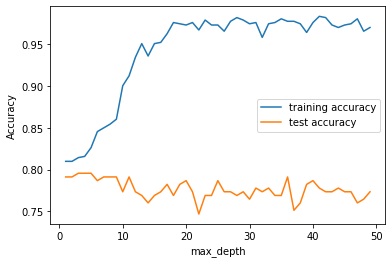

In [32]:
train_results2 = []
test_results2 = []

max_depths = range(1, 50)
for max_depth in max_depths:
    rf2 = RandomForestClassifier(n_estimators=10, max_depth=max_depth)
    rf2.fit(X_train, y_train)
    train_results2.append(rf2.score(X_train, y_train))
    test_results2.append(rf2.score(X_test, y_test))
plt.plot(max_depths, train_results2, label="training accuracy")
plt.plot(max_depths, test_results2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Por último, con la ayuda de la gráfica anterior determinamos que valores bajos de "max_depth" benefician el comportamiento del método Random Forest para nuestro set de datos. Así, determinamos un valor ideal de max_depth=6.


In [33]:
rf = RandomForestClassifier(n_estimators=10, max_depth= 6).fit(X_train, y_train.astype('int'))
print("Training set score: {:.3f}".format(rf.score(X_train, y_train.astype('int'))))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test.astype('int'))))

Training set score: 0.828
Test set score: 0.791


## Naive Bayes

El método Naive Bayes proporciona una forma en que podemos calcular la probabilidad de una hipótesis dado nuestro conocimiento previo. Existen 3 tipos dependiendo de la naturaleza de los datos.

1) BernoulliNB: Datos son binarios.

2) MultinomialNB: Datos representan un conteo.

3) GaussianNB: Distribución gaussiana de los datos.

Dada la naturaleza de nuestro set de datos (binario), decidimos utilizar el método Bernoulli.

Importamos librerías y cargamos los set de entrenamiento y prueba.


In [34]:
from sklearn.naive_bayes import BernoulliNB

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=13)

### Bernoulli Naive Bayes

In [36]:
nbb = BernoulliNB().fit(X_train, y_train.astype('int'))
print("Training set score: {:.3f}".format(nbb.score(X_train, y_train.astype('int'))))
print("Test set score: {:.3f}".format(nbb.score(X_test, y_test.astype('int'))))

Training set score: 0.796
Test set score: 0.831
